In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad
from scipy.integrate import quad


c:\python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\python39\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
from tqdm import tqdm

# Using individual functions as previous codes

In [3]:

# Function to calculate the NFW halo density profile
def nfw_halo(r, rs,rhos):
    x = r / rs
    return rhos / (x * (1 + x)**2)


In [152]:
# Constants and parameters
rs = 18.6  # Scale radius in kpc
rho0 = 0.383  # Local DM density in GeV/cm^3
r0 = 8.2  # Sun position in kpc
m_chi = 1000# Dark matter mass in GeV
t = 3.15 * 10**17  # in s
rhos = (rho0 * ((r0 / rs) * (1 + r0 / rs)**(2)))
R = 200
# Parameters for the Milky Way density profile
Rs = 3.8 * 10**(-11)  # Example value for Rs
Rsp = 0.34 * 10**(-3)  # Example value for Rsp
gamma_sp = 2.35  # Example value for gamma_sp


In [14]:
sigma_v =  np.logspace(-33,-19,10)
rho_sat = []
R_sat = []

# Calculating rho_sat and R_sat
for i in range(len(sigma_v)):
    rh = m_chi / (sigma_v[i] * t)
    rho_sat.append(rh) 
    r_sat = (((rhos/ rh) * (rs / Rsp) * ((1 + (Rsp / rs))**(-2)))**(1 / gamma_sp)) * Rsp
    R_sat.append(r_sat)

C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_43968\2902166896.py:24: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  J, _ = quad(integrand, 0, l_max)


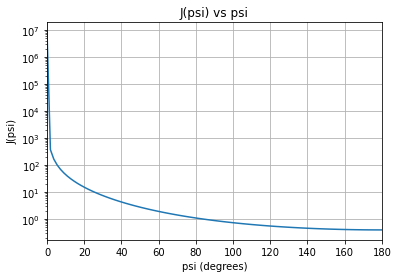

In [7]:
def nfw_halo(r, rs, rhos):
    return rhos / ((r/rs) * (1 + r/rs)**2)

# Function to calculate r(l, r0)
def r_func(l, r0, psi):
    return np.sqrt(r0**2 - 2 * r0 * l * np.cos(psi) + l**2)

# Calculate l_max for each psi
psi = np.linspace(0, np.pi, 100)

l_max_list = []

for psi_val in psi:
    l_max = r0 * np.cos(psi_val) + np.sqrt(R**2 - r0**2 * np.sin(psi_val)**2)
    l_max_list.append(l_max)

# Calculate J_factor for each psi
J_factor = []

for i in range(len(psi)):
    psi_val = psi[i]
    l_max = l_max_list[i]
    integrand = lambda l: nfw_halo(r_func(l, r0, psi_val), rs, rhos)**2/ (rho0**2 * r0)
    J, _ = quad(integrand, 0, l_max)
    J_factor.append(J)

# Plot J_factor vs psi
plt.plot(psi*180/np.pi, J_factor)
plt.xlabel('psi (degrees)')
#plt.xscale('log')
plt.yscale('log')
plt.ylabel('J(psi)')
plt.xlim(0,180)
plt.title('J(psi) vs psi')
plt.grid(True)
plt.show()

# Code of the region from Rs to Rsat

In [75]:
psi_Rs = np.linspace(0,np.arctan(2*Rs/r0),10)
psi_Rs_to_Rsat = []
for i in range(len(R_sat)):
    p = np.linspace(np.max(psi_Rs),np.arctan(R_sat[i]/r0),10)
    psi_Rs_to_Rsat.append(p)

In [271]:
l_Rs1 = [r0 * np.cos(p) + np.sqrt(16*Rs**2 - r0**2 * np.sin(p)**2) for p in psi_Rs]
l_Rs2 = [r0 * np.cos(p) - np.sqrt(16*Rs**2 - r0**2 * np.sin(p)**2) for p in psi_Rs]

l_Rsat_new_1 = []
for i in range(len(psi_Rs)):
    l_Rsat_new = []
    for j in range(len(psi_Rs)):
        l_Rsat_1 = r0 * np.cos(psi_Rs[j]) + np.sqrt(R_sat[i]**2 - r0**2 * np.sin(psi_Rs[j])**2)
        l_Rsat_new.append(l_Rsat_1)
    l_Rsat_new_1.append(l_Rsat_new)

l_Rsat_new_2 = []
for i in range(len(psi_Rs_to_Rsat)):
    l_Rsat_new1 = []
    for j in range(len(psi_Rs_to_Rsat[i])):
        l_Rsat_2 = r0 * np.cos(psi_Rs_to_Rsat[i][j]) + np.sqrt(max(1e-30,R_sat[i]**2 - r0**2 * np.sin(psi_Rs_to_Rsat[i][j])**2))
        l_Rsat_new1.append(l_Rsat_2)
    l_Rsat_new_2.append(l_Rsat_new1)

l_Rsat_new_3 = []
for i in range(len(psi_Rs_to_Rsat)):
    l_Rsat_new3 = []
    for j in range(len(psi_Rs_to_Rsat[i])):
        l_Rsat_3 = r0 * np.cos(psi_Rs_to_Rsat[i][j]) - np.sqrt(max(1e-30,R_sat[i]**2 - r0**2 * np.sin(psi_Rs_to_Rsat[i][j])**2))
        l_Rsat_new3.append(l_Rsat_3)
    l_Rsat_new_3.append(l_Rsat_new3)

l_Rsat_new_4 = []
for i in range(len(psi_Rs)):
    l_Rsat_new4 = []
    for j in range(len(psi_Rs)):
        l_Rsat_4 = r0 * np.cos(psi_Rs[j]) - np.sqrt(R_sat[i]**2 - r0**2 * np.sin(psi_Rs[j])**2)
        l_Rsat_new4.append(l_Rsat_4)
    l_Rsat_new_4.append(l_Rsat_new4)


In [272]:
J_inner1_1st = []
for i in range(len(psi_Rs)):
    J_inner1 = 0
    for j in range(len(psi_Rs)):
        r_func = lambda l,psi:np.sqrt(max(1e-2,r0**2 - 2 * r0 * l * np.cos(psi) + l**2))
        integrand_inner1 = lambda l: (rho_sat[i]* (r_func(l,psi_Rs[i]) / R_sat[i])**(-0.5))**2 * np.sin(psi_Rs[i]) * 2 * np.pi * 3.08e21
        integral1 = quad(integrand_inner1, l_Rs1[i], l_Rsat_new_1[i][j])[0]
        J_inner1 += integral1
    J_inner1_1st.append(J_inner1)

J_inner1_1st

[0.0,
 2.6722774923949245e+28,
 9.566472715052433e+26,
 2.386710704520387e+25,
 5.2149985324567795e+23,
 1.0648939508119554e+22,
 2.0860962096269292e+20,
 3.97250419649772e+18,
 7.410132136626136e+16,
 1360646201145397.2]

In [276]:
J_inner1_2nd = []
for i in range(len(psi_Rs_to_Rsat)):
    J_inner1 = 0
    for j in range(len(psi_Rs_to_Rsat)):
        r_func = lambda l,psi:np.sqrt(max(1e-8,r0**2 - 2 * r0 * l * np.cos(psi) + l**2))
        integrand_inner2 = lambda l: (rho_sat[i]* (r_func(l,psi_Rs_to_Rsat[i][j]) / R_sat[i])**(-0.5))**2 * np.sin(psi_Rs_to_Rsat[i][j]) * 2 * np.pi * 3.08e21
        integral2 = quad(integrand_inner2, l_Rsat_new_3[i][j], l_Rsat_new_2[i][j])[0]
        J_inner1 += integral2
    J_inner1_2nd.append(integral2)

J_inner1_2nd


C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_43968\946573145.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral2 = quad(integrand_inner2, l_Rsat_new_3[i][j], l_Rsat_new_2[i][j])[0]
C:\Users\RITABIK BANERJEE\AppData\Local\Temp\ipykernel_43968\946573145.py:7: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral2 = quad(integrand_inner2, l_Rsat_new_3[i][j], l_Rsat_new_2[i][j])[0]


[7.73746006749702e+28,
 1.2628866668039902e+27,
 2.0612484190916595e+25,
 3.364312219686504e+23,
 5.491136636757188e+21,
 2.330244844888402e+21,
 8.060198997668206e+20,
 2.776530786323916e+20,
 9.55304962143976e+19,
 1.1980252868010035e+19]

In [274]:
J_inner1_3rd = []
for i in range(len(psi_Rs)):
    J_inner1 = 0
    for j in range(len(psi_Rs)):
        r_func = lambda l,psi:np.sqrt(max(1e-2,r0**2 - 2 * r0 * l * np.cos(psi) + l**2))
        integrand_inner3 = lambda l: (rho_sat[i]* (r_func(l,psi_Rs[i]) / R_sat[i])**(-0.5))**2 * np.sin(psi_Rs[i]) * 2 * np.pi * 3.08e21
        integral3 = quad(integrand_inner3, l_Rsat_new_4[i][j], l_Rs2[i])[0]
        J_inner1 += integral3
    J_inner1_3rd.append(J_inner1)

J_inner1_3rd

[0.0,
 2.6722774923949245e+28,
 9.566472715052433e+26,
 2.386710704520387e+25,
 5.2149985324567795e+23,
 1.0648939508119554e+22,
 2.0860962096269292e+20,
 3.97250419649772e+18,
 7.410132136626136e+16,
 1360646201145397.2]

In [277]:
J_inner_1st_region = []
for i in range(len(J_inner1_2nd)):
    J_1st = J_inner1_1st[i] + J_inner1_2nd[i] + J_inner1_3rd[i]
    J_inner_1st_region.append(J_1st)
J_inner_1st_region

[7.73746006749702e+28,
 5.470843651470248e+28,
 1.9339070272014033e+27,
 4.80706453123764e+25,
 1.048490843128113e+24,
 2.362812386112751e+22,
 1.2232391416922065e+21,
 2.8559808702538708e+20,
 9.567869885713012e+19,
 1.1982974160412326e+19]

# Code of the region from Rsat to Rsp

In [144]:
psi_Rsat = [np.linspace(0, np.arctan(R_sat[i]/r0), 10) for i in range(len(R_sat))]
psi_Rsat_to_Rsp = []
for i in range(len(psi_Rs_to_Rsat)):
    p = np.linspace(np.max(psi_Rs_to_Rsat[i]),np.arctan(Rsp/r0),10)
    psi_Rsat_to_Rsp.append(p)


In [145]:
l_Rsp1 = [r0 * np.cos(p) + np.sqrt(Rsp**2 - r0**2 * np.sin(p)**2) for p in psi_Rs]
l_Rsp2 = []
for i in range(len(psi_Rs_to_Rsat)):
    l_Rsp_2 = []
    for j in range(len(psi_Rs_to_Rsat[i])):
        l_Rsp_new_2 = r0 * np.cos(psi_Rs_to_Rsat[i][j]) + np.sqrt(Rsp**2 - r0**2 * np.sin(psi_Rs_to_Rsat[i][j])**2)
        l_Rsp_2.append(l_Rsp_new_2)
    l_Rsp2.append(l_Rsp_2)

l_Rsp3 = []
for i in range(len(psi_Rsat_to_Rsp)):
    l_Rsp_3 = []
    for j in range(len(psi_Rsat_to_Rsp[i])):
        l_Rsp_new_3 = r0 * np.cos(psi_Rsat_to_Rsp[i][j]) + np.sqrt(Rsp**2 - r0**2 * np.sin(psi_Rsat_to_Rsp[i][j])**2)
        l_Rsp_3.append(l_Rsp_new_3)
    l_Rsp3.append(l_Rsp_3)

l_Rsp4 = []
for i in range(len(psi_Rsat_to_Rsp)):
    l_Rsp_4 = []
    for j in range(len(psi_Rsat_to_Rsp[i])):
        l_Rsp_new_4 = r0 * np.cos(psi_Rsat_to_Rsp[i][j]) - np.sqrt(Rsp**2 - r0**2 * np.sin(psi_Rsat_to_Rsp[i][j])**2)
        l_Rsp_4.append(l_Rsp_new_4)
    l_Rsp4.append(l_Rsp_4)

l_Rsp5 = []
for i in range(len(psi_Rs_to_Rsat)):
    l_Rsp_5 = []
    for j in range(len(psi_Rs_to_Rsat[i])):
        l_Rsp_new_5 = r0 * np.cos(psi_Rs_to_Rsat[i][j]) - np.sqrt(Rsp**2 - r0**2 * np.sin(psi_Rs_to_Rsat[i][j])**2)
        l_Rsp_5.append(l_Rsp_new_5)
    l_Rsp5.append(l_Rsp_5)

l_Rsp6 = [r0 * np.cos(p) - np.sqrt(Rsp**2 - r0**2 * np.sin(p)**2) for p in psi_Rs]

In [216]:
J_inner2_1st = []
for i in range(len(psi_Rs)):
    J_inner2 = 0
    for j in range(len(psi_Rs)):
        r_func = lambda l,psi:np.sqrt(max(1e-5,r0**2 - 2 * r0 * l * np.cos(psi) + l**2))
        integrand_inner1 = lambda l: (nfw_halo(Rsp, rs, rhos)*(r_func(l,psi_Rs[i])/Rsp)**(-gamma_sp))**2 * np.sin(psi_Rs[i]) * 2 * np.pi * 3.08e21
        integral1 = quad(integrand_inner1, l_Rsat_new_1[i][j], l_Rsp1[i])[0]
        J_inner2 += integral1
    J_inner2_1st.append(J_inner2)

J_inner2_1st

[0.0,
 698938449160.4446,
 1397856381654.815,
 2096643289740.0413,
 2794659489831.6265,
 3488360581710.2354,
 4158684271131.2017,
 4705305045963.896,
 4608806924904.771,
 1214462534654.6555]

In [217]:
J_inner2_2nd = []
for i in range(len(psi_Rs_to_Rsat)):
    J_inner2 = 0
    for j in range(len(psi_Rs_to_Rsat[i])):
        r_func = lambda l,psi:np.sqrt(max(1e-5,r0**2 - 2 * r0 * l * np.cos(psi) + l**2))
        integrand_inner2 = lambda l: (nfw_halo(Rsp, rs, rhos)*(r_func(l,psi_Rs_to_Rsat[i][j])/Rsp)**(-gamma_sp))**2 * np.sin(psi_Rs_to_Rsat[i][j]) * 2 * np.pi * 3.08e21
        integral2 = quad(integrand_inner2, l_Rsat_new_2[i][j], l_Rsp2[i][j])[0]
        J_inner2 += integral2
    J_inner2_2nd.append(J_inner2)

J_inner2_2nd

[15668300953399.682,
 60642656264070.78,
 267132639153101.1,
 1215151312473487.2,
 5566868596619790.0,
 2.552700586076421e+16,
 1.1674659422858722e+17,
 5.264662005453133e+17,
 2.200033055401109e+18,
 3.6417165661540756e+18]

In [218]:
J_inner2_3rd = []
for i in range(len(psi_Rsat_to_Rsp)):
    J_inner2 = 0
    for j in range(len(psi_Rsat_to_Rsp[i])):
        r_func = lambda l,psi:np.sqrt(max(1e-5,r0**2 - 2 * r0 * l * np.cos(psi) + l**2))
        integrand_inner3 = lambda l: (nfw_halo(Rsp, rs, rhos)*(r_func(l,psi_Rsat_to_Rsp[i][j])/Rsp)**(-gamma_sp))**2 * np.sin(psi_Rsat_to_Rsp[i][j]) * 2 * np.pi * 3.08e21
        integral3 = quad(integrand_inner3,l_Rsp4[i][j] , l_Rsp3[i][j])[0]
        J_inner2 += integral3
    J_inner2_3rd.append(J_inner2)

J_inner2_3rd

[1.629094156314629e+19,
 1.6291005530112965e+19,
 1.6291299221599472e+19,
 1.6292647610291749e+19,
 1.6298837541200814e+19,
 1.6327237130420677e+19,
 1.6457194160917953e+19,
 1.7044289245014376e+19,
 1.949598132796823e+19,
 1.9125475322430345e+19]

In [219]:
J_inner2_4th = []
for i in range(len(psi_Rs_to_Rsat)):
    J_inner2 = 0
    for j in range(len(psi_Rs_to_Rsat[i])):
        r_func = lambda l,psi:np.sqrt(max(1e-5,r0**2 - 2 * r0 * l * np.cos(psi) + l**2))
        integrand_inner4 = lambda l: (nfw_halo(Rsp, rs, rhos)*(r_func(l,psi_Rs_to_Rsat[i][j])/Rsp)**(-gamma_sp))**2 * np.sin(psi_Rs_to_Rsat[i][j]) * 2 * np.pi * 3.08e21
        integral4 = quad(integrand_inner4,l_Rsp5[i][j],l_Rsat_new_3[i][j])[0]
        J_inner2 += integral4
    J_inner2_4th.append(J_inner2)

J_inner2_4th

[15668300953399.682,
 60642656264070.78,
 267132639153101.1,
 1215151312473487.2,
 5566868596619790.0,
 2.552700586076421e+16,
 1.1674659422858722e+17,
 5.264662005453133e+17,
 2.200033055401109e+18,
 3.6417165661540756e+18]

In [220]:
J_inner2_5th = []
for i in range(len(psi_Rs)):
    J_inner2 = 0
    for j in range(len(psi_Rs)):
        r_func = lambda l,psi:np.sqrt(max(1e-5,r0**2 - 2 * r0 * l * np.cos(psi) + l**2))
        integrand_inner5 = lambda l: (nfw_halo(Rsp, rs, rhos)*(r_func(l,psi_Rs[i])/Rsp)**(-gamma_sp))**2 * np.sin(psi_Rs[i]) * 2 * np.pi * 3.08e21
        integral5 = quad(integrand_inner5,l_Rsp6[i],l_Rsat_new_4[i][j])[0]
        J_inner2 += integral5
    J_inner2_5th.append(J_inner2)

J_inner2_5th

[0.0,
 698938449160.4446,
 1397856381654.815,
 2096643289740.0413,
 2794659489831.6265,
 3488360581710.2354,
 4158684271131.2017,
 4705305045963.896,
 4608806924904.771,
 1214462534654.6555]

In [221]:
J_inner_2nd_region = []
for i in range(len(J_inner1_2nd)):
    J_2nd = J_inner2_1st[i] + J_inner2_2nd[i] + J_inner2_3rd[i] + J_inner2_4th[i] + J_inner2_5th[i]
    J_inner_2nd_region.append(J_2nd)
J_inner_2nd_region

[1.6290972899748196e+19,
 1.6291128213302393e+19,
 1.629183628259054e+19,
 1.6295082106203275e+19,
 1.6309976867713032e+19,
 1.6378298118863368e+19,
 1.6690695666743669e+19,
 1.8097231056715094e+19,
 2.38960566563843e+19,
 2.6408910883663565e+19]

# Code to outer Regions

In [155]:
psi_Rsp_to_R = []
for i in range(len(psi_Rsat_to_Rsp)):
    psi_R = np.linspace(np.max(psi_Rsat_to_Rsp[i]),np.arctan(R/r0),10)
    psi_Rsp_to_R.append(psi_R)

In [166]:
l_R1 = [r0 * np.cos(p) + np.sqrt(R**2 - r0**2 * np.sin(p)**2) for p in psi_Rs]
l_R2 = []
for i in range(len(psi_Rs_to_Rsat)):
    l_R_2 = []
    for j in range(len(psi_Rs_to_Rsat[i])):
        l_R_new_2 = r0 * np.cos(psi_Rs_to_Rsat[i][j]) + np.sqrt(R**2 - r0**2 * np.sin(psi_Rs_to_Rsat[i][j])**2)
        l_R_2.append(l_R_new_2)
    l_R2.append(l_R_2)

l_R3 = []
for i in range(len(psi_Rsat_to_Rsp)):
    l_R_3 = []
    for j in range(len(psi_Rsat_to_Rsp[i])):
        l_R_new_3 = r0 * np.cos(psi_Rsat_to_Rsp[i][j]) + np.sqrt(R**2 - r0**2 * np.sin(psi_Rsat_to_Rsp[i][j])**2)
        l_R_3.append(l_R_new_3)
    l_R3.append(l_R_3)

l_R4 = []
for i in range(len(psi_Rsp_to_R)):
    l_R_4 = []
    for j in range(len(psi_Rsp_to_R[i])):
        l_R_new_4 = r0 * np.cos(psi_Rsp_to_R[i][j]) + np.sqrt(R**2 - r0**2 * np.sin(psi_Rsp_to_R[i][j])**2)
        l_R_4.append(l_R_new_4)
    l_R4.append(l_R_4)

l_R5 = []
for i in range(len(psi_Rs_to_Rsat)):
    l_R_5 = []
    for j in range(len(psi_Rs_to_Rsat[i])):
        l_R_new_5 = r0 * np.cos(psi_Rs_to_Rsat[i][j]) - np.sqrt(R**2 - r0**2 * np.sin(psi_Rs_to_Rsat[i][j])**2)
        l_R_5.append(l_R_new_5)
    l_R5.append(l_R_5)

l_R6 = []
for i in range(len(psi_Rsat_to_Rsp)):
    l_R_6 = []
    for j in range(len(psi_Rsat_to_Rsp[i])):
        l_R_new_6 = r0 * np.cos(psi_Rsat_to_Rsp[i][j]) - np.sqrt(R**2 - r0**2 * np.sin(psi_Rsat_to_Rsp[i][j])**2)
        l_R_6.append(l_R_new_6)
    l_R6.append(l_R_6)

l_R7 = [r0 * np.cos(p) - np.sqrt(R**2 - r0**2 * np.sin(p)**2) for p in psi_Rs]


In [316]:
J_outer1 = 0
for i in range(len(psi_Rs)):
    r_func = lambda l,psi:np.sqrt(max(0.01,r0**2 - 2 * r0 * l * np.cos(psi) + l**2))
    integrand_outer1 = lambda l: nfw_halo(r_func(l,psi_Rs[i]), rs, rhos)**2 * np.sin(psi_Rs[i]) * 2* np.pi * 3.08e21
    integral1 = quad(integrand_outer1,l_Rsp1[i],l_R1[i])[0]
    J_outer1 += integral1

J_outer1

719073588750419.2

In [315]:
J_outer2 = []
for i in range(len(psi_Rs_to_Rsat)):
    J_outer = 0
    for j in range(len(psi_Rs_to_Rsat[i])):
        r_func = lambda l,psi:np.sqrt(max(0.01,r0**2 - 2 * r0 * l * np.cos(psi) + l**2))
        integrand_outer2 = lambda l: nfw_halo(r_func(l,psi_Rs_to_Rsat[i][j]), rs, rhos)**2 * np.sin(psi_Rs_to_Rsat[i][j]) * 2* np.pi * 3.08e21
        integral2 = quad(integrand_outer2,l_Rsp2[i][j],l_R2[i][j])[0]
        J_outer += integral2
    J_outer2.append(J_outer)

J_outer2

[3582137476280414.0,
 1.3864345483849212e+16,
 6.107335836343325e+16,
 2.7782552827029024e+17,
 1.2730063273961083e+18,
 5.842210064586849e+18,
 2.6820934357728354e+19,
 1.2314126945846808e+20,
 5.653878346801036e+20,
 2.5968100170921484e+21]

In [314]:
J_outer3 = []
for i in range(len(psi_Rsat_to_Rsp)):
    J_outer = 0
    for j in range(len(psi_Rsat_to_Rsp[i])):
        r_func = lambda l,psi:np.sqrt(max(0.01,r0**2 - 2 * r0 * l * np.cos(psi) + l**2))
        integrand_outer3 = lambda l: nfw_halo(r_func(l,psi_Rsat_to_Rsp[i][j]), rs, rhos)**2 * np.sin(psi_Rsat_to_Rsp[i][j]) * 2* np.pi * 3.08e21
        integral3 = quad(integrand_outer3,l_Rsp3[i][j],l_R3[i][j])[0]
        J_outer += integral3
    J_outer3.append(J_outer)

J_outer3

[3.219297642701045e+21,
 3.21930793014031e+21,
 3.2193551631718076e+21,
 3.219572025628144e+21,
 3.2205677129831243e+21,
 3.225139246528253e+21,
 3.246128754797445e+21,
 3.342500448630738e+21,
 3.78502382336077e+21,
 5.819136722717016e+21]

In [313]:
J_outer4 = []
for i in range(len(psi_Rsp_to_R)):
    J_outer = 0
    for j in range(len(psi_Rsp_to_R[i])):
        r_func = lambda l,psi:np.sqrt(max(0.01,r0**2 - 2 * r0 * l * np.cos(psi) + l**2))
        integrand_outer4 = lambda l: nfw_halo(r_func(l,psi_Rsp_to_R[i][j]), rs, rhos)**2 * np.sin(psi_Rsp_to_R[i][j]) * 2* np.pi * 3.08e21
        integral4 = quad(integrand_outer4,0,l_R4[i][j])[0]
        J_outer += integral4
    J_outer4.append(J_outer)

J_outer4

[6.254807509856502e+23,
 6.254807509856502e+23,
 6.254807509856502e+23,
 6.254807509856502e+23,
 6.254807509856502e+23,
 6.254807509856502e+23,
 6.254807509856502e+23,
 6.254807509856502e+23,
 6.254807509856502e+23,
 6.254807509856502e+23]

In [312]:
J_outer5 = []
for i in range(len(psi_Rsat_to_Rsp)):
    J_outer = 0
    for j in range(len(psi_Rsat_to_Rsp[i])):
        r_func = lambda l,psi:np.sqrt(max(0.01,r0**2 - 2 * r0 * l * np.cos(psi) + l**2))
        integrand_outer5 = lambda l: nfw_halo(r_func(l,psi_Rsat_to_Rsp[i][j]), rs, rhos)**2 * np.sin(psi_Rsat_to_Rsp[i][j]) * 2* np.pi * 3.08e21
        integral5 = quad(integrand_outer5,l_R5[i][j],l_Rsp4[i][j])[0]
        J_outer += integral5
    J_outer5.append(J_outer)

J_outer5

[3.2192976427010165e+21,
 3.2193079301402966e+21,
 3.2193551631717667e+21,
 3.219572025628174e+21,
 3.2205677129830666e+21,
 3.225139246528212e+21,
 3.2461287547974556e+21,
 3.3425004486307244e+21,
 3.7850238233607427e+21,
 5.819136722717036e+21]

In [311]:
J_outer6 = []
for i in range(len(psi_Rs_to_Rsat)):
    J_outer = 0
    for j in range(len(psi_Rs_to_Rsat[i])):
        r_func = lambda l,psi:np.sqrt(max(0.01,r0**2 - 2 * r0 * l * np.cos(psi) + l**2))
        integrand_outer6 = lambda l: nfw_halo(r_func(l,psi_Rs_to_Rsat[i][j]), rs, rhos)**2 * np.sin(psi_Rs_to_Rsat[i][j]) * 2* np.pi * 3.08e21
        integral6 = quad(integrand_outer6,l_R6[i][j],l_Rsp5[i][j])[0]
        J_outer += integral6
    J_outer6.append(J_outer)

J_outer6

[3582137476280305.5,
 1.3864345483848768e+16,
 6.1073358363433496e+16,
 2.7782552827028896e+17,
 1.2730063273961044e+18,
 5.842210064587081e+18,
 2.6820934357727494e+19,
 1.2314126945846785e+20,
 5.6538783468010124e+20,
 2.5968100170920687e+21]

In [310]:
J_outer7 = 0
for i in range(len(psi_Rs)):
    r_func = lambda l,psi:np.sqrt(max(0.01,r0**2 - 2 * r0 * l * np.cos(psi) + l**2))
    integrand_outer7 = lambda l: nfw_halo(r_func(l,psi_Rs[i]), rs, rhos)**2 * np.sin(psi_Rs[i]) * 2* np.pi * 3.08e21
    integral7 = quad(integrand_outer7,l_R7[i],l_Rsp6[i])[0]
    J_outer7 += integral7

J_outer7

719073588750390.4

In [317]:
J_outer_region = []
for i in range(len(J_outer2)):
    J_outer = J_outer1 + J_outer2[i] + J_outer3[i] + J_outer4[i] + J_outer5[i] + J_outer6[i] + J_outer7
    J_outer_region.append(J_outer)

J_outer_region

[6.319193548734745e+23,
 6.31919396012769e+23,
 6.319195848968577e+23,
 6.319204521261103e+23,
 6.319244338624185e+23,
 6.31942715336983e+23,
 6.320266518021077e+23,
 6.324120358599758e+23,
 6.34181575739879e+23,
 6.423126459034156e+23]

# Total J_factor

In [318]:
J = []
for i in range(len(J_inner_1st_region)):
    J_factor = J_inner_1st_region[i]+J_inner_2nd_region[i] + J_outer_region[i]
    J.append(J_factor)

In [319]:
J

[7.7375232610616046e+28,
 5.470906845038963e+28,
 1.9345389630781364e+27,
 4.870258205958462e+25,
 1.680431586967399e+24,
 6.555872174962295e+23,
 6.332665816394667e+23,
 6.327157311780579e+23,
 6.343011504953926e+23,
 6.423510377884598e+23]

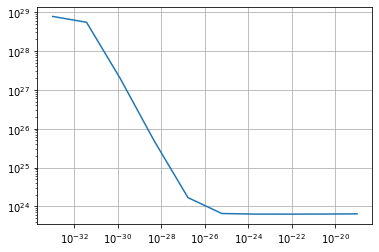

In [321]:
plt.plot(sigma_v,J)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.show()